#Problem Statement: Given a description about a bbc_news channel,classify it in one of the 4 categories

In [36]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [37]:
# import data
dataset = pd.read_csv('bbc-text.csv')
dataset.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [38]:
dataset.tail()

,category,text
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...
2224,sport,souness delight at euro progress boss graeme s...


In [39]:
dataset.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

<Axes: >

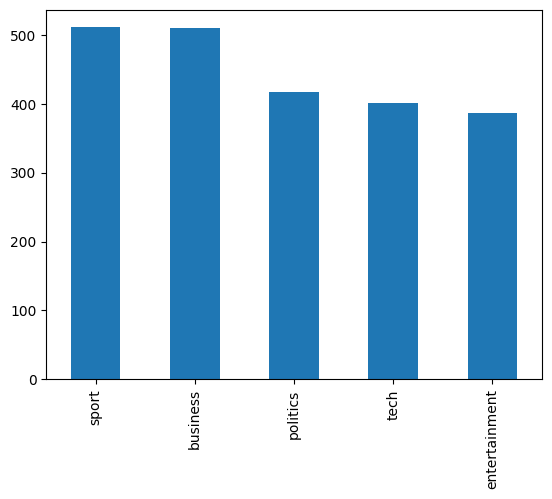

In [40]:
dataset.category.value_counts().plot(kind='bar')

In [41]:
dataset.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [42]:
#Add the new column which gives a unique number to each of these labels

dataset['category_num'] = dataset['category'].map({
    'tech' : 0,
    'business': 1,
    'sport': 2,
    'entertainment': 3,
    'politics': 4
})

#checking the results
dataset.head(5)

,category,text,category_num
0,tech,tv future in the hands of viewers with home th...,0
1,business,worldcom boss left books alone former worldc...,1
2,sport,tigers wary of farrell gamble leicester say ...,2
3,sport,yeading face newcastle in fa cup premiership s...,2
4,entertainment,ocean s twelve raids box office ocean s twelve...,3


#preprocessing on text data

In [43]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [44]:
dataset['preprocessed_txt'] = dataset['text'].apply(preprocess)

In [45]:
dataset.head()

,category,text,category_num,preprocessed_txt
0,tech,tv future in the hands of viewers with home th...,0,tv future hand viewer home theatre system pl...
1,business,worldcom boss left books alone former worldc...,1,worldcom boss leave book worldcom boss ber...
2,sport,tigers wary of farrell gamble leicester say ...,2,tiger wary farrell gamble leicester rush m...
3,sport,yeading face newcastle in fa cup premiership s...,2,yeade face newcastle fa cup premiership newcas...
4,entertainment,ocean s twelve raids box office ocean s twelve...,3,ocean s raid box office ocean s crime caper ...


#Train test split

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset.text,
    dataset.category_num,
    test_size=0.3, # 30% samples will go to test dataset
    random_state=42,
    stratify=dataset.category_num
)

In [47]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (1557,)
Shape of X_test:  (668,)


In [48]:
X_train.head()

1506    collins banned in landmark case sprinter miche...
595     branson show flops on us screens entrepreneur ...
457     podcasts mark rise of diy radio an apple ipod ...
1582    martinez sees off vinci challenge veteran span...
1129    fightstar take to the stage charlie simpson to...
Name: text, dtype: object

In [49]:
y_train.value_counts()

2    357
1    357
4    292
0    281
3    270
Name: category_num, dtype: int64

In [50]:
y_test.value_counts()

2    154
1    153
4    125
0    120
3    116
Name: category_num, dtype: int64

#use KNN as the classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_preds = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_preds))
print(clf.score(X_test,y_test))
print(clf.score(X_train,y_train))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       120
           1       0.98      0.84      0.91       153
           2       0.94      0.97      0.96       154
           3       0.99      0.76      0.86       116
           4       0.80      0.96      0.87       125

    accuracy                           0.91       668
   macro avg       0.91      0.90      0.90       668
weighted avg       0.92      0.91      0.90       668

0.905688622754491
0.9499036608863198


In [52]:
X_test[:5]

410     bollywood dvd fraudster is jailed a major dist...
1453    broadband set to revolutionise tv bt is starti...
1087    us interest rates increased to 2% us interest ...
2072    hatfield executives go on trial engineering fi...
1399    european medal chances improve what have the e...
Name: text, dtype: object

In [53]:
#predicted the class of given text values
y_test[:5]

410     3
1453    0
1087    1
2072    4
1399    2
Name: category_num, dtype: int64

In [56]:
X_test[:5][410]

'bollywood dvd fraudster is jailed a major distributor of pirated dvds of bollywood films has been sent to prison for three years.  jayanti amarishi buhecha from cambridge was found guilty of two trademark offences last month  and sentenced at harrow crown court  london  on tuesday. buhecha  who made £26 000 per month from his illegal trade  was called  one of the biggest bollywood pirates in the uk  by the sentencing judge. the british phonographic industry (bpi) worked for two years on the case.  an operation was launched against buhecha in 2002 after complaints were received about his activities. the judge in the case  which lasted seven days  said that  a heavy penalty was called for because of the enormous damage buhecha caused to legitimate business . fake dvds were manufactured in pakistan and malaysia and sold on wholesale to shops by buhecha  who traded in conterfeit dvds in 2002 and 2003.  in december 2002  he was stopped in his car by trading standards officers  who uncovere

In [57]:
#our model has predicted correct class
y_preds[:5]

array([3, 0, 1, 2, 2])

#plot_confusion_matrix

In [58]:
from sklearn.metrics import confusion_matrix
cms = confusion_matrix(y_test, y_preds)
cms

array([[118,   0,   0,   0,   2],
       [  5, 129,   5,   1,  13],
       [  3,   0, 150,   0,   1],
       [ 11,   2,   1,  88,  14],
       [  0,   1,   4,   0, 120]])

Text(95.72222222222221, 0.5, 'Truth')

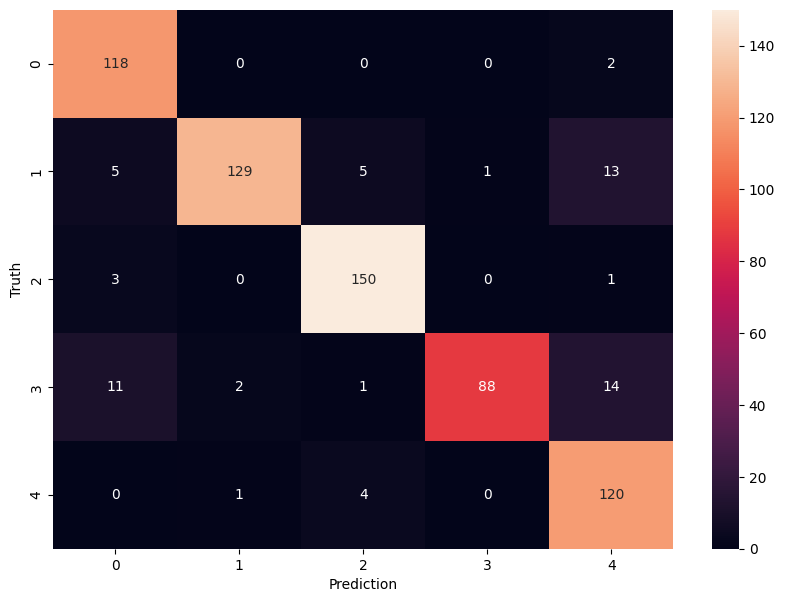

In [59]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cms, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

#use   naive_bayes_MultinomialNB as the classifier.

In [60]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clfNB = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clfNB.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_predNB = clfNB.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_predNB))
print(clfNB.score(X_test,y_test))
print(clfNB.score(X_train,y_train))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       120
           1       0.95      0.96      0.96       153
           2       0.92      1.00      0.96       154
           3       1.00      0.78      0.87       116
           4       0.93      0.96      0.94       125

    accuracy                           0.94       668
   macro avg       0.94      0.93      0.94       668
weighted avg       0.94      0.94      0.94       668

0.9401197604790419
0.9839434810533076


#plot_Confusion_matrix

In [61]:
from sklearn.metrics import confusion_matrix
cmnb = confusion_matrix(y_test, y_predNB)
cmnb

array([[117,   2,   1,   0,   0],
       [  3, 147,   1,   0,   2],
       [  0,   0, 154,   0,   0],
       [  7,   3,   9,  90,   7],
       [  0,   2,   3,   0, 120]])

Text(95.72222222222221, 0.5, 'Truth')

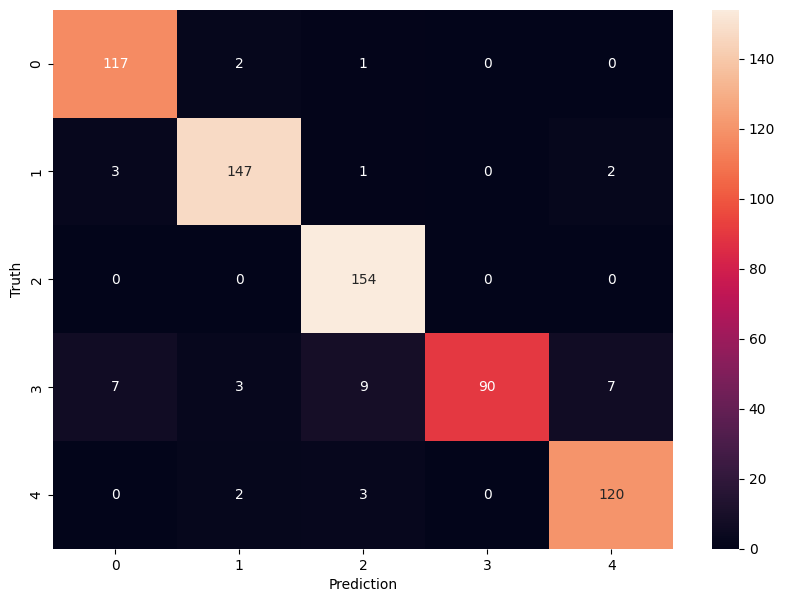

In [62]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cmnb, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

#RandomForestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clfrf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clfrf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_predrf = clfrf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_predrf))
print(clfrf.score(X_test,y_test))
print(clfrf.score(X_train,y_train))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       120
           1       0.91      0.96      0.93       153
           2       0.97      0.99      0.98       154
           3       0.97      0.89      0.93       116
           4       0.95      0.92      0.93       125

    accuracy                           0.95       668
   macro avg       0.95      0.94      0.95       668
weighted avg       0.95      0.95      0.95       668

0.9476047904191617
1.0


# plot_confusion_matrix

In [64]:
from sklearn.metrics import confusion_matrix
cmrf = confusion_matrix(y_test, y_predrf)
cmrf

array([[116,   3,   0,   0,   1],
       [  3, 147,   1,   0,   2],
       [  0,   2, 152,   0,   0],
       [  3,   4,   3, 103,   3],
       [  0,   6,   1,   3, 115]])

Text(95.72222222222221, 0.5, 'Truth')

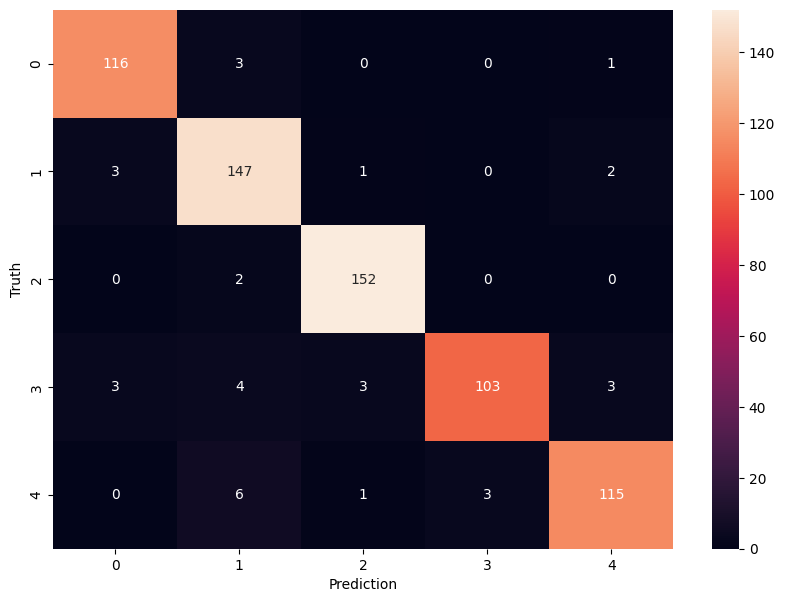

In [65]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cmrf, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [66]:
#final_score
print(clf.score(X_test,y_test))
print(clfNB.score(X_test,y_test))
print(clfrf.score(X_test,y_test))

0.905688622754491
0.9401197604790419
0.9476047904191617
